In [3]:
import pandas as pd

In [14]:
arquivo_excel= pd.ExcelFile('ANALISE-ALUNOS-REDARITO.xlsx')

In [15]:
abas = arquivo_excel.sheet_names
print(abas)

['CONVERSÃO_ALUNOS', 'ALUNOS_ACESSOS', 'NÃO_ALUNO_ACESSOS', 'DASHBOARD']


In [16]:
for aba in abas:
    df = pd.read_excel(arquivo_excel, sheet_name=aba)
    print(f'Dados da aba: {aba}')
    print(df.head())
    


Dados da aba: CONVERSÃO_ALUNOS
                           EMAIL INÍCIO DO CONTRATO  \
0       larissaaestudo@gmail.com         2024-07-30   
1  flaviamaiany.maiany@gmail.com         2024-05-14   
2         jessicamabds@gmail.com         2024-06-11   
3  tavinhomonteiro2007@gmail.com         2024-06-04   
4   gukkiebunnylilycat@gmail.com         2024-06-16   

                     TS_TIME     AÇÃO PRIMEIRO ACESSO  DIFERENÇA DE TEMPO  
0  2024-07-30 15:29:30.000 Z  sign_up      2024-07-30                 0.0  
1  2024-05-14 18:47:41.000 Z  sign_up      2024-05-14                 0.0  
2  2024-06-11 08:30:46.000 Z  sign_up      2024-06-11                 0.0  
3  2024-06-04 15:35:05.000 Z  sign_up      2024-06-04                 0.0  
4  2024-06-16 13:24:50.000 Z  sign_up      2024-06-16                 0.0  
Dados da aba: ALUNOS_ACESSOS
                         EMAIL PRIMEIRO ACESSO     AÇÃO TIPO DE USUÁRIO  \
0    biabeafariias79@gmail.com      2024-06-11  sign_in           ALUNO   
1  

In [19]:
conversao_alunos = pd.read_excel(arquivo_excel, 'CONVERSÃO_ALUNOS')
alunos_acessos = pd.read_excel(arquivo_excel, 'ALUNOS_ACESSOS')

In [25]:
total_sign_ups = len(conversao_alunos)

In [23]:
alunos_convertidos = alunos_acessos['ALUNO CONVERTIDO CONVERTIDO'].str.contains('SIM').sum()

In [38]:
alunos_convertidos


16883

In [26]:
taxa_conversao = (alunos_convertidos / total_sign_ups) * 100
print(f"Taxa de Conversão: {taxa_conversao:.2f}%")


Taxa de Conversão: 41.39%


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.style.use("dark_background")

data = {'Tipo': ['Convertidos', 'Não Convertidos'],
        'Quantidade': [alunos_convertidos, total_sign_ups - alunos_convertidos]}

df = pd.DataFrame(data)


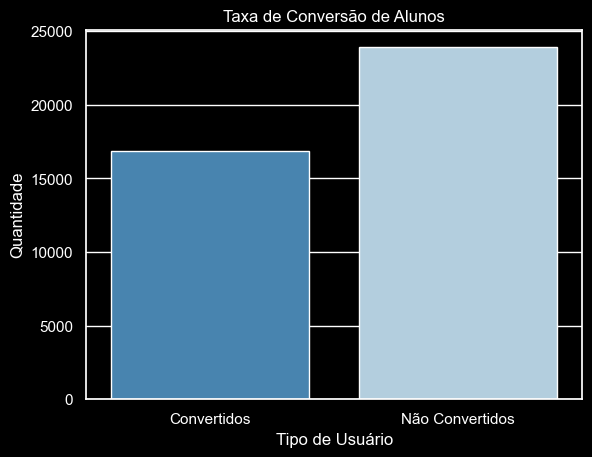

In [28]:


sns.barplot(x='Tipo', y='Quantidade', data=df, palette="Blues_r")
plt.title("Taxa de Conversão de Alunos")
plt.xlabel("Tipo de Usuário")
plt.ylabel("Quantidade")
plt.show()


In [29]:

alunos_acessos['PRIMEIRO ACESSO'] = pd.to_datetime(alunos_acessos['PRIMEIRO ACESSO'])


start_date = '2024-06-03'
acessos_filtrados = alunos_acessos[alunos_acessos['PRIMEIRO ACESSO'] >= start_date]


In [30]:

acessos_por_dia = acessos_filtrados.groupby(acessos_filtrados['PRIMEIRO ACESSO'].dt.date).size()


acessos_por_dia_percentual = (acessos_por_dia / acessos_por_dia.sum()) * 100


print(acessos_por_dia_percentual)


PRIMEIRO ACESSO
2024-06-03    4.728779
2024-06-04    3.691033
2024-06-05    3.242483
2024-06-06    3.048618
2024-06-07    2.360588
                ...   
2024-08-08    0.779260
2024-08-09    0.520774
2024-08-10    0.383928
2024-08-11    0.440947
2024-08-12    1.201201
Length: 71, dtype: float64


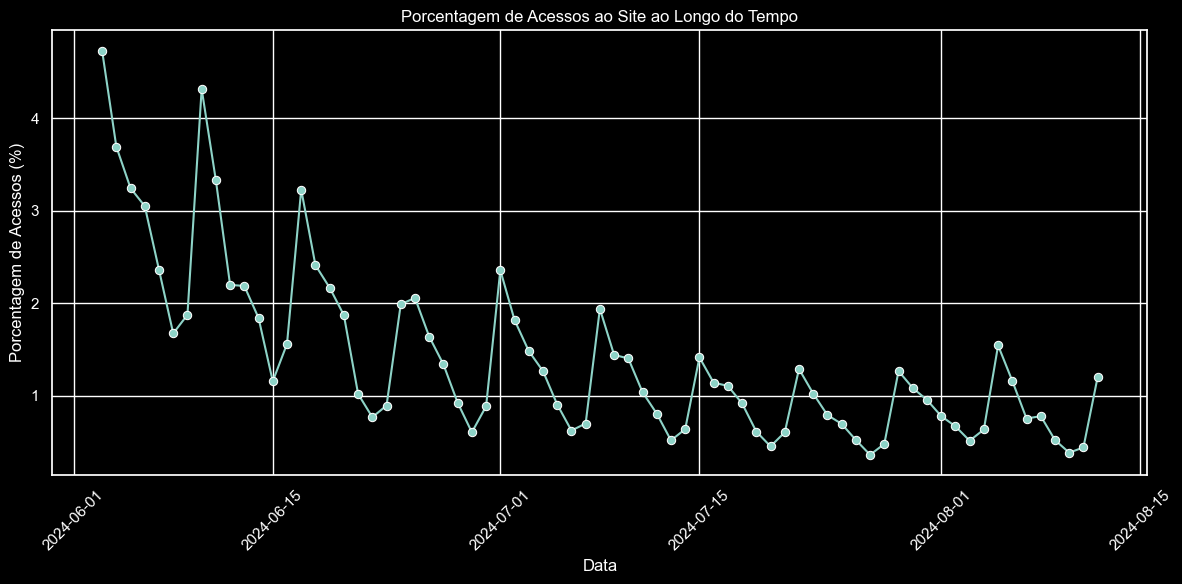

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.style.use("dark_background")


plt.figure(figsize=(12, 6))
sns.lineplot(x=acessos_por_dia_percentual.index, y=acessos_por_dia_percentual.values, marker='o', palette="Blues_r")


plt.title("Porcentagem de Acessos ao Site ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Porcentagem de Acessos (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:

alunos_acessos['PRIMEIRO ACESSO'] = pd.to_datetime(alunos_acessos['PRIMEIRO ACESSO'])
alunos_acessos['DATA INÍCIO DO CONTRATO'] = pd.to_datetime(alunos_acessos['DATA INÍCIO DO CONTRATO'])


In [33]:

alunos_acessos['DIFERENÇA DE TEMPO'] = (alunos_acessos['DATA INÍCIO DO CONTRATO'] - alunos_acessos['PRIMEIRO ACESSO']).dt.days


print(alunos_acessos[['EMAIL', 'PRIMEIRO ACESSO', 'DATA INÍCIO DO CONTRATO', 'DIFERENÇA DE TEMPO']].head())


                         EMAIL PRIMEIRO ACESSO DATA INÍCIO DO CONTRATO  \
0    biabeafariias79@gmail.com      2024-06-11              2024-06-11   
1     bekahtenorio09@gmail.com      2024-07-01              2024-07-01   
2    cacildacsouza@hotmail.com      2024-06-06              2024-06-06   
3  andryalopesandrya@gmail.com      2024-05-30              2024-05-30   
4   guilhermekaua359@gmail.com      2024-06-21              2024-06-21   

   DIFERENÇA DE TEMPO  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  


In [34]:

descricao = alunos_acessos['DIFERENÇA DE TEMPO'].describe()
print(descricao)


count    7495.000000
mean        4.570514
std        11.858467
min       -66.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        87.000000
Name: DIFERENÇA DE TEMPO, dtype: float64


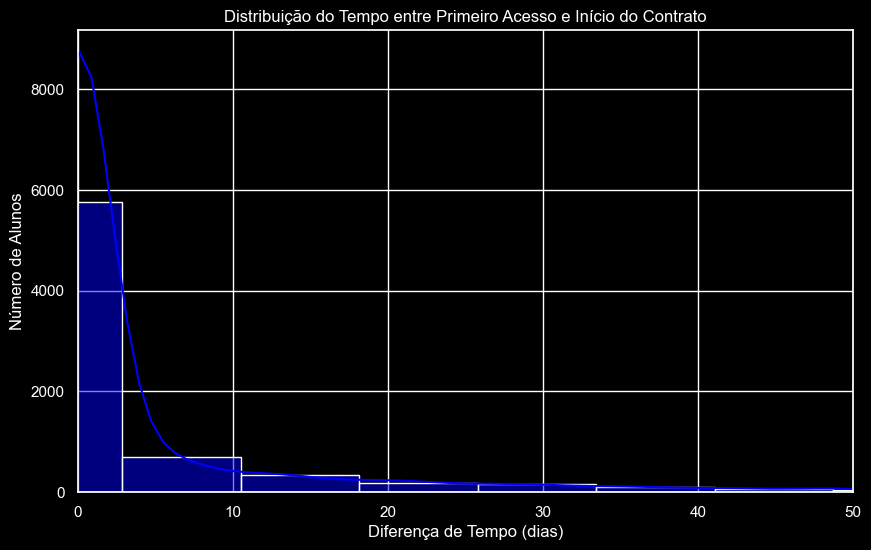

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.style.use("dark_background")

plt.figure(figsize=(10, 6))
sns.histplot(alunos_acessos['DIFERENÇA DE TEMPO'], bins=20, kde=True, color="blue")

plt.xlim(0, 50)  # Exemplo: mostrando apenas a faixa de 0 a 100 dias no eixo x

plt.title("Distribuição do Tempo entre Primeiro Acesso e Início do Contrato")
plt.xlabel("Diferença de Tempo (dias)")
plt.ylabel("Número de Alunos")
plt.show()
